1. Data Understanding

In [2]:
import pandas as pd
# Loading the re-uploaded training data
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')
# Displaying the first few rows of the training data
train_data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [3]:
test_data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8145235,2002-04-02T10:00:00Z,2002-05-07T00:00:00Z,26,M,S,1,0,600.18,F,40.0,5,CAUGHT RIGHT HAND WITH HAMMER BURN TO RIGHT HAND,5300
1,WC2005111,1988-04-06T16:00:00Z,1988-04-15T00:00:00Z,31,M,M,0,0,311.54,F,35.0,5,SPRAINED RIGHT ANKLE FRACTURE RIGHT ELBOW,2000
2,WC6899143,1999-03-08T09:00:00Z,1999-04-04T00:00:00Z,57,M,M,0,0,1000.00,F,38.0,5,STRUCK HAMMER CRUSH INJURY FINGERS HAND,20000
3,WC5502023,1996-07-26T09:00:00Z,1996-09-04T00:00:00Z,33,M,M,0,0,200.00,F,38.0,5,STRUCK AGAINST AIR HOSE STRUCK GLASS LACERATIO...,350
4,WC4785156,1994-04-13T14:00:00Z,1994-07-07T00:00:00Z,32,F,M,0,0,359.60,F,40.0,5,FOREIGN BODY IN RIGHT FOOT BRUISED RIGHT BIG TOE,3000


The training data has been successfully loaded, and we can observe the following columns:

- ClaimNumber: Pengidentifikasi polisi yang unik
- DateTimeOfAccident: Tanggal dan waktu kejadian kecelakaan
- DateReported: Tanggal kecelakaan dilaporkan
- Age: Umur pekerja
- Gender: Jenis kelamin pekerja
- MaritalStatus: Status perkawinan pekerja. (M) menikah, (S) single, (U) tidak diketahui.
- DependentChildren: Jumlah anak yang menjadi tanggungan
- DependentsOther: Jumlah tanggungan selain anak
- WeeklyWages: Upah mingguan total
- PartTimeFullTime: Biner (P) atau (F)
- HoursWorkedPerWeek: Total jam kerja per minggu
- DaysWorkedPerWeek: Jumlah hari kerja per minggu
- ClaimDescription: Deskripsi klaim dalam teks bebas
- InitialIncurredClaimCost: Estimasi awal dari biaya klaim oleh perusahaan asuransi
- UltimateIncurredClaimCost: Total pembayaran klaim oleh perusahaan asuransi. Ini adalah kolom yang Anda diminta untuk memprediksi dalam set tes.

Statistical Summary

In [4]:
# Displaying the statistical summary of the numerical variables
train_data.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


In [5]:
test_data.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost
count,36000.000000,36000.000000,36000.000000,36000.00000,36000.000000,36000.000000,36000.000000
mean,33.856556,0.120000,0.009611,416.37745,37.758841,4.912417,7679.306889
std,12.124416,0.522437,0.108357,242.49109,11.951296,0.540451,17501.991600
min,13.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000
25%,23.000000,0.000000,0.000000,200.00000,38.000000,5.000000,650.000000
50%,32.000000,0.000000,0.000000,395.18500,38.000000,5.000000,2000.000000
75%,43.000000,0.000000,0.000000,500.00000,40.000000,5.000000,9500.000000
max,80.000000,8.000000,5.000000,7400.00000,700.000000,7.000000,725000.000000


Numerical features: Index(['Age', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')


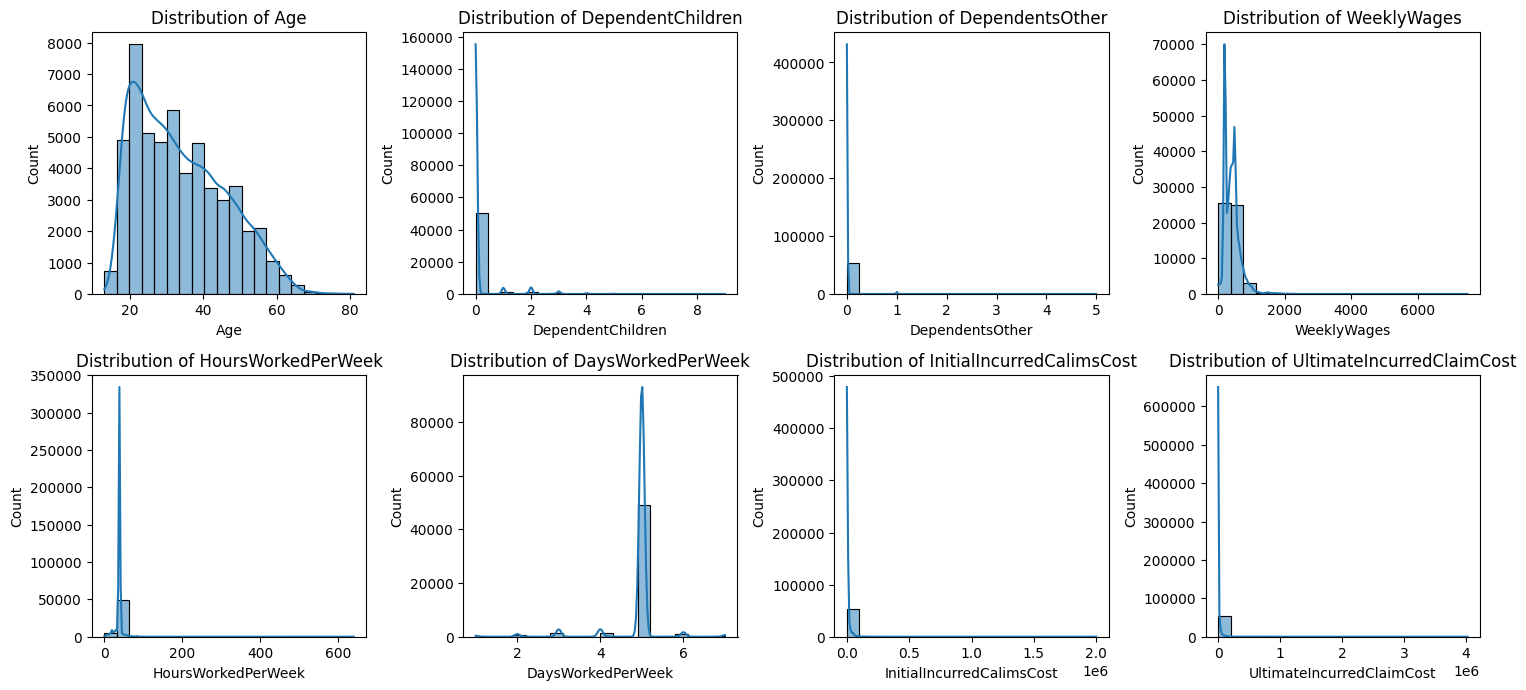

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numerical features in the dataset
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
print(f'Numerical features: {numerical_features}')

# Plotting histograms for numerical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, idx)
    sns.histplot(train_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Berdasarkan data pelatihan, saya menemukan beberapa poin menarik:

Sebagian besar klaiman tidak memiliki anak tanggungan atau tanggungan lainnya.
Sebagian besar klaiman bekerja 5 hari seminggu.
Terdapat variasi signifikan dalam biaya klaim awal dan akhir.
Berdasarkan histogram yang saya dapatkan:

Beberapa fitur menunjukkan kecondongan (skewness) yang signifikan dan kemungkinan adanya outlier.
Ada beberapa nilai yang jauh lebih tinggi, yang bisa jadi adalah outlier. Metode yang saya sarankan untuk memperbaiki outlier adalah metode penutupan.
Kelebihan:
Dapat menggunakan pengetahuan domain atau persentil (misalnya, persentil ke-99) untuk membatasi nilai.
Tidak bergantung pada asumsi distribusi normal.
Kekurangan:
Memerlukan pemilihan manual untuk nilai batas, yang mungkin bersifat sewenang-wenang.
Mungkin kehilangan beberapa informasi jika penutupan terlalu agresif.

In [7]:
def capping(train_data, test_data, variable):
    # Calculate the 1st and 99th percentiles
    lower_bound = train_data[variable].quantile(0.01)
    upper_bound = train_data[variable].quantile(0.99)

    # Replace the outliers
    train_data[variable] = train_data[variable].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    test_data[variable] = test_data[variable].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return train_data, test_data

# Capping outliers in the numerical features
train_data, test_data = capping(train_data, test_data, 'HoursWorkedPerWeek')

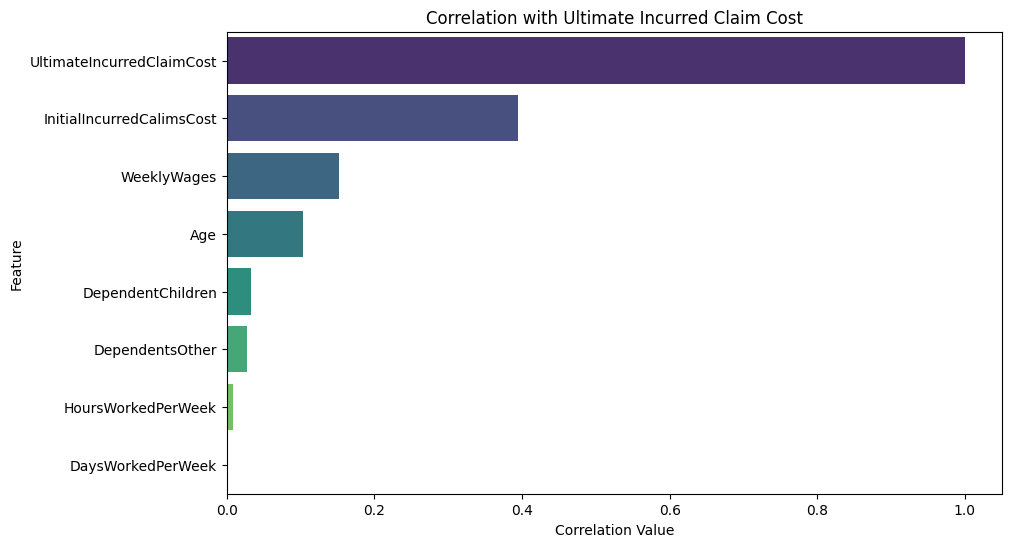

In [8]:
# Calculating the correlation matrix for numerical features
correlation_matrix = train_data[numerical_features].corr()

# Focusing on the correlation with the target variable "UltimateIncurredClaimCost"
correlations_with_target = correlation_matrix["UltimateIncurredClaimCost"].sort_values(ascending=False)

# Convert correlations with target into a DataFrame
correlations_data = pd.DataFrame(correlations_with_target).reset_index()
correlations_data.columns = ['Feature', 'Correlation']

# Create the barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlations_data, palette='viridis')

plt.title('Correlation with Ultimate Incurred Claim Cost')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.show()

Berdasarkan diagram, poin kunci saya adalah:

'InitialIncurredCalimsCost' memiliki korelasi positif sekitar 0,395. Ini menunjukkan bahwa ketika biaya klaim awal meningkat, biaya klaim akhir cenderung juga meningkat.
'WeeklyWages' memiliki korelasi positif sekitar 0,152. Ini menunjukkan bahwa upah mingguan yang lebih tinggi dikaitkan dengan biaya klaim akhir yang lebih tinggi.
'Age' memiliki korelasi positif sekitar 0,103. Orang yang lebih tua mungkin memiliki biaya klaim akhir yang lebih tinggi.

Handling Missing Values and Data type checking

In [9]:
# Displaying the data types of each column
data_types = train_data.dtypes

# Checking for missing values in each column
missing_values = train_data.isnull().sum()

# Combining the data types and missing values information
data_overview = pd.DataFrame({'Data Types': data_types, 'Missing Values': missing_values})
data_overview

,Data Types,Missing Values
ClaimNumber,object,0
DateTimeOfAccident,object,0
DateReported,object,0
Age,int64,0
Gender,object,0
MaritalStatus,object,29
DependentChildren,int64,0
DependentsOther,int64,0
WeeklyWages,float64,0
PartTimeFullTime,object,0


Analisis tipe data dan nilai yang hilang mengungkapkan hal berikut:

Ada beberapa kolom dengan tipe objek (kemungkinan string).
Beberapa kolom memiliki tipe integer dan float.
Terdapat 29 nilai yang hilang di kolom 'MaritalStatus', yang mungkin memerlukan penanganan.

In [10]:
#for test data
data_types = test_data.dtypes
missing_values = test_data.isnull().sum()

data_overview_test = pd.DataFrame({'Data Types': data_types, 'Missing Values': missing_values})
data_overview_test

,Data Types,Missing Values
ClaimNumber,object,0
DateTimeOfAccident,object,0
DateReported,object,0
Age,int64,0
Gender,object,0
MaritalStatus,object,18
DependentChildren,int64,0
DependentsOther,int64,0
WeeklyWages,float64,0
PartTimeFullTime,object,0


In [11]:
def marital_check(df):
    return df['UltimateIncurredClaimCost'].groupby(df['MaritalStatus']).agg(['count','median','mean'])

marital_check(train_data)

,count,median,mean
MaritalStatus,,,
M,22516,4166.460054,12024.933597
S,26161,2322.799731,9105.578095
U,5294,5851.980317,16067.822199


Untuk kolom 'Marital' di data pelatihan, saya akan menggantinya dengan 'S' yang merupakan kelompok dengan biaya terendah. Dan untuk data tes, saya akan menggunakan metode penutupan.

In [12]:
train_data = train_data.fillna('S')
marital_check(train_data)

,count,median,mean
MaritalStatus,,,
M,22516,4166.460054,12024.933597
S,26190,2321.174746,9101.392880
U,5294,5851.980317,16067.822199


In [13]:
# Filling missing values in the 'MaritalStatus' column with the mode
marital_status_mode = test_data['MaritalStatus'].mode().iloc[0]
test_data['MaritalStatus'].fillna(marital_status_mode, inplace=True)

# Verifying that there are no more missing values
missing_values_after_filling = test_data.isnull().sum()
missing_values_after_filling[missing_values_after_filling > 0]
train_data['UltimateIncurredClaimCost'].groupby(train_data['Gender']).agg(['count','median','mean'])

,count,median,mean
Gender,,,
F,12338,4487.067790,12877.578378
M,41660,3043.537866,10448.540576
U,2,6086.342984,6086.342984


In [14]:
#I want use mean redistribution so U change to M
train_data['Gender'].replace('U','M',inplace=True)
train_data['UltimateIncurredClaimCost'].groupby(train_data['Gender']).agg(['count','median','mean'])

,count,median,mean
Gender,,,
F,12338,4487.067790,12877.578378
M,41662,3044.010142,10448.331167


EDA for text processing

In [15]:
vars = ['UltimateIncurredClaimCost','ClaimDescription']
train_data[vars].sort_values(by='UltimateIncurredClaimCost', ascending=False).head(5)

,UltimateIncurredClaimCost,ClaimDescription
11027,4.027136e+06,SLIPPED ON WET FLOOR FRACTURED BASE OF HAND
23036,8.657706e+05,WHILST MASSAGING FELT PAIN SOFT TISSUE INJURY ...
37813,8.237063e+05,TABLE TIPPED OVER SOFT TISSUE INJURY RIGHT HAND
3193,7.684851e+05,LIFTING BACK BACK STRAIN
923,7.420032e+05,SHEARING HAND PIECE BLISTER RIGHT HAND


In [16]:
train_data[vars].sort_values(by='UltimateIncurredClaimCost', ascending=True).head(5)

,UltimateIncurredClaimCost,ClaimDescription
24518,121.886805,FOREIGN BODY METAL FRAGMENT LEFT CORNEAL FOREI...
19972,123.164880,PARTICLE FROM DRILL FOREIGN BODY RIGHT EYE
39397,124.579661,GLASS INTO EYE FOREIGN BODY LEFT EYE
18419,129.106130,FOREIGN BODY RUST FOREIGN BODY LEFT EYE
21976,131.457013,PARTICLE IN EYE WHILE GRINDING FOREIGN BODY RI...


In [17]:
#print shape
print(train_data.shape)
print(test_data.shape)
print(train_data.isnull().sum())

(54000, 15)
(36000, 14)
ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64


2. Data Preprocessing & Feature Engineering

Konversi DateTime: Ini penting untuk ekstraksi komponen tahun, bulan, dan hari.
Ekstraksi Komponen Waktu: Fitur baru ini bisa menangkap beberapa musiman atau tren dalam data.
Perlakuan Terhadap Outlier: Outlier pada 'UltimateIncurredClaimCost' dibatasi pada 1 juta untuk membatasi pengaruh mereka pada model.
Fitur Tanggal: Tahun, bulan, dan hari diekstraksi untuk fitur temporal tambahan.
Penambangan Teks: Kata kunci dalam 'ClaimDescription' digunakan untuk membuat fitur baru.
Fitur Interaksi: Dibuat dengan menggabungkan fitur yang sudah ada.
Penambangan Teks Lanjutan: Notebook ini juga mengeksplorasi TF-IDF untuk fitur teks, yang menghasilkan MSE yang lebih tinggi.
Enkoding Kategorikal: fitur kategorikal diubah menjadi kode label.
Membuang Kolom yang Tidak Perlu: kolom datetime asli dan kolom teks atau pengenal lainnya dibuang karena mereka telah diubah atau tidak digunakan dalam proses pemodelan.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from symspellpy import SymSpell, Verbosity
import numpy as np


def treat_outliers(df):
    if 'UltimateIncurredClaimCost' in df.columns:
        df['UltimateIncurredClaimCost'] = np.where(df['UltimateIncurredClaimCost'] > 1e6, 1e6, df['UltimateIncurredClaimCost'])
    return df

def extract_date_features(df):
    ### Extract Year, Month, Day for both train and test data
    for col in ['DateTimeOfAccident', 'DateReported']:
        df[col] = pd.to_datetime(df[col])
        df[col+'_Year'] = df[col].dt.year
        df[col+'_Month'] = df[col].dt.month
        df[col+'_Day'] = df[col].dt.day
    return df

def correct_spelling(df):
    sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
    corrected_text_data = []
    for sentence in df['ClaimDescription']:
        suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=3)
        corrected_sentence = suggestions[0].term if suggestions else sentence
        corrected_text_data.append(corrected_sentence)
    df['Corrected_ClaimDescription'] = corrected_text_data
    return df

def simple_text_mining(df):
    text = ['NECK', 'BACK', 'KNEE', 'FINGER', 'EYE', 'STRUCK', 'HAMMER', 'LADDER', 'STAIR', 'FELT', 'TRAUMA']
    for name in text:
        df['CD_' + name] = np.where((df['Corrected_ClaimDescription'].str.find(name) < 0), 0, 1)
    
    # Additional text features
    additional_text_features = {
        'CD_FOREIGN_BODY': 'FOREIGN BODY',
        'CD_BACK_STRAIN': 'BACK STRAIN',
        'CD_SOFT_TISSUE_': 'SOFT TISSUE INJURY',
        'CD_WORKPLACE_STRESS': 'WORKPLACE STRESS',
        'CD_LOWER_BACK_STRAIN': 'LOWER BACK STRAIN',
        'CD_LEFT_RIGHT': ['LEFT', 'RIGHT'],
        'CD_LACERAT_': 'LACERAT'
    }
    
    for feature, keyword in additional_text_features.items():
        if isinstance(keyword, list):
            df[feature] = np.where((df['Corrected_ClaimDescription'].str.find(keyword[0]) < 0) & (df['Corrected_ClaimDescription'].str.find(keyword[1]) < 0), 0, 1)
        else:
            df[feature] = np.where((df['Corrected_ClaimDescription'].str.find(keyword) < 0), 0, 1)
    
    return df

def encode_categoricals(df):
    encoder = OneHotEncoder(drop='first', sparse=False)
    for col in ['Gender', 'MaritalStatus', 'PartTimeFullTime']:
        one_hot = pd.DataFrame(encoder.fit_transform(df[[col]]))
        one_hot.columns = [col + '_' + str(i) for i in range(one_hot.shape[1])]
        df.drop(col, axis=1, inplace=True)
        df = pd.concat([df, one_hot], axis=1)
    return df

def add_interaction_features(df):
    ### For now, just add Age multiplied by WeeklyWages
    df['Age_times_WeeklyWages'] = df['Age'] * df['WeeklyWages']
    return df

def prepare_for_modeling(df):
    drop_cols = ['ClaimNumber', 'ClaimDescription', 'DateTimeOfAccident', 'DateReported', 'Corrected_ClaimDescription']
    df.drop(drop_cols, axis=1, inplace=True)
    return df

def additional_steps(df):
    # One-hot-encoding for WeekdayOfAccident
    if 'WeekdayOfAccident' in df.columns:
        df = pd.get_dummies(df, columns=['WeekdayOfAccident'], drop_first=True)

    # If ClaimDescription exists, perform TF-IDF Vectorization
    if 'Corrected_ClaimDescription' in df.columns:
        vectorizer = TfidfVectorizer(max_features=50)
        tfidf_matrix = vectorizer.fit_transform(df['Corrected_ClaimDescription'])
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
        df = pd.concat([df, tfidf_df], axis=1)
    
    return df

# Main function to process the data
def process_data(df):
    df = treat_outliers(df)
    df = extract_date_features(df)
    df = correct_spelling(df)
    df = simple_text_mining(df)
    df = encode_categoricals(df)
    df = add_interaction_features(df)
    df = additional_steps(df)
    df = prepare_for_modeling(df)
    return df

processed_train_data = process_data(train_data)
processed_test_data = process_data(test_data)

#print shape
print(processed_train_data.shape , processed_test_data.shape)

/home/azril/ac_ml/exp_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/azril/ac_ml/exp_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/azril/ac_ml/exp_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/azril/ac_ml/exp_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

(54000, 87) (36000, 86)


In [19]:
# Columns present in train but not in test
missing_in_test = set(processed_train_data.columns) - set(processed_test_data.columns)
missing_in_train = set(processed_test_data.columns) - set(processed_train_data.columns)
print("Missing in Test Data:", missing_in_test)
print("Missing in Train Data:", missing_in_train)

Missing in Test Data: {'UltimateIncurredClaimCost', 'floor'}
Missing in Train Data: {'between'}


In [20]:
for col in missing_in_test - {'UltimateIncurredClaimCost'}:  # We exclude the target variable
    processed_test_data[col] = 0  # or another default value

for col in missing_in_train - {'UltimateIncurredClaimCost'}:  # We exclude the target variable
    processed_train_data[col] = 0  # or another default value

# Re-ordering the columns in the test data to match the order in the training data
processed_test_data = processed_test_data[processed_train_data.drop('UltimateIncurredClaimCost', axis=1).columns]

# Checking shape
print(processed_train_data.shape , processed_test_data.shape)

(54000, 88) (36000, 87)


In [27]:
#make copy first row in test data to dict
test_dict = processed_test_data.iloc[0].to_dict()
print(test_dict)

{'Age': 26.0, 'DependentChildren': 1.0, 'DependentsOther': 0.0, 'WeeklyWages': 600.18, 'HoursWorkedPerWeek': 40.0, 'DaysWorkedPerWeek': 5.0, 'InitialIncurredCalimsCost': 5300.0, 'DateTimeOfAccident_Year': 2002.0, 'DateTimeOfAccident_Month': 4.0, 'DateTimeOfAccident_Day': 2.0, 'DateReported_Year': 2002.0, 'DateReported_Month': 5.0, 'DateReported_Day': 7.0, 'CD_NECK': 0.0, 'CD_BACK': 0.0, 'CD_KNEE': 0.0, 'CD_FINGER': 0.0, 'CD_EYE': 0.0, 'CD_STRUCK': 0.0, 'CD_HAMMER': 0.0, 'CD_LADDER': 0.0, 'CD_STAIR': 0.0, 'CD_FELT': 0.0, 'CD_TRAUMA': 0.0, 'CD_FOREIGN_BODY': 0.0, 'CD_BACK_STRAIN': 0.0, 'CD_SOFT_TISSUE_': 0.0, 'CD_WORKPLACE_STRESS': 0.0, 'CD_LOWER_BACK_STRAIN': 0.0, 'CD_LEFT_RIGHT': 0.0, 'CD_LACERAT_': 0.0, 'Gender_0': 1.0, 'MaritalStatus_0': 1.0, 'MaritalStatus_1': 0.0, 'PartTimeFullTime_0': 0.0, 'Age_times_WeeklyWages': 15604.679999999998, 'and': 0.0, 'ankle': 0.0, 'arm': 0.0, 'back': 0.0, 'body': 0.0, 'bruised': 0.0, 'caught': 0.4434920495087984, 'cut': 0.0, 'elbow': 0.0, 'eye': 0.0, '

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import time

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [29]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    processed_train_data.drop('UltimateIncurredClaimCost', axis=1), 
    processed_train_data['UltimateIncurredClaimCost'], 
    test_size=0.25, 
    random_state=123  # Replace this with your specific seed if needed
)

# Define models
models = {
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(logging_level='Silent')
}

param_grids = {
    'XGBRegressor': {'learning_rate': [0.02, 0.025], 'max_depth': [5, 6, 7], 'n_estimators': [500], 'colsample_bytree': [0.9], 'subsample': [0.7], 'tree_method': ['hist']},
    'LGBMRegressor': {'learning_rate': [0.02, 0.025], 'n_estimators': [500], 'num_leaves': [30, 40, 50], 'feature_fraction': [0.7]},
    'CatBoostRegressor': {'iterations': [100, 200], 'depth': [6, 8, 10]}
}

# Initialize best_models dictionary to store best models
best_models = {}
best_params = {} 

# Hyperparameter tuning using RandomizedSearchCV
for model_name, model in models.items():
    start_time = time.time()
    print(f"Training {model_name}...")
    
    random_search = RandomizedSearchCV(
        model, 
        param_distributions=param_grids[model_name], 
        scoring='neg_mean_squared_error', 
        cv=3, 
        n_iter=5, 
        random_state=42  
    )
    
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_
    best_params[model_name] = random_search.best_params_

Training XGBRegressor...
Training LGBMRegressor...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13572
[LightGBM] [Info] Number of data points in the train set: 27000, number of used features: 68
[LightGBM] [Info] Start training from score 11005.143050
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction i

Evaluating XGBRegressor...
Best Parameters for XGBRegressor: {'tree_method': 'hist', 'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.02, 'colsample_bytree': 0.9}
Root Mean Squared Error: 24619.920046557698
Mean Squared Error: 606140463.0988936


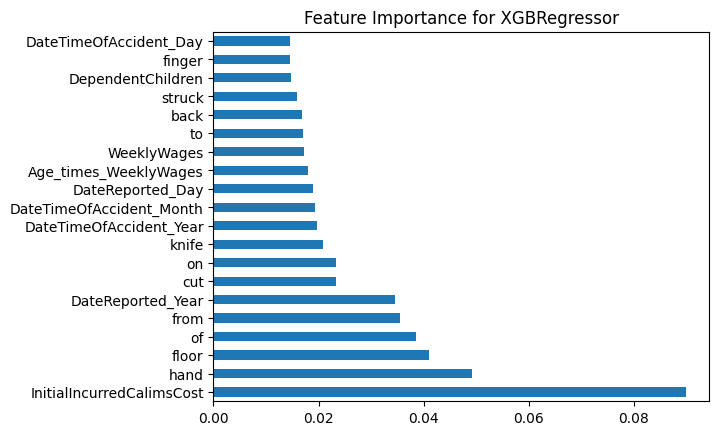

Evaluating LGBMRegressor...
Best Parameters for LGBMRegressor: {'num_leaves': 30, 'n_estimators': 500, 'learning_rate': 0.02, 'feature_fraction': 0.7}
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
Root Mean Squared Error: 24797.7373564525
Mean Squared Error: 614927777.9995998


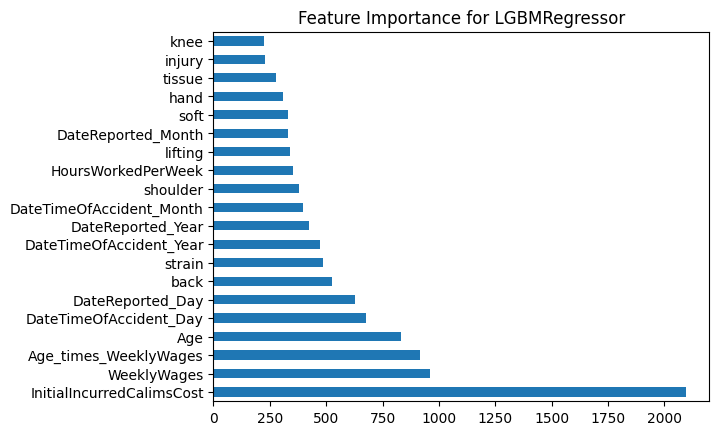

Evaluating CatBoostRegressor...
Best Parameters for CatBoostRegressor: {'iterations': 200, 'depth': 6}
Root Mean Squared Error: 24713.195800036923
Mean Squared Error: 610742046.6509626


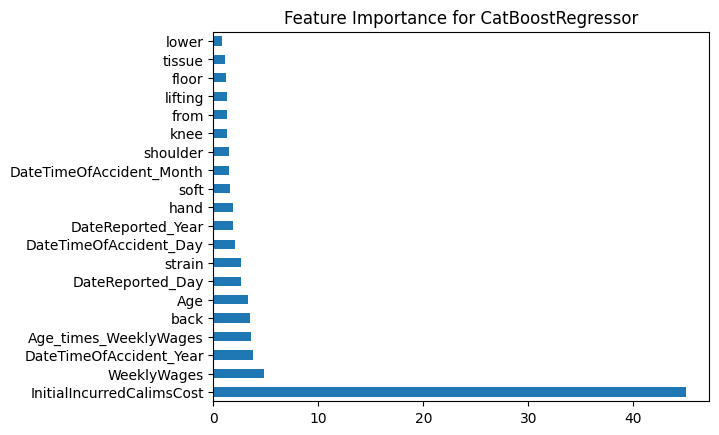

In [30]:
# Evaluate models and print best parameters
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    print(f"Best Parameters for {model_name}: {best_params[model_name]}")
    
    y_pred = best_models[model_name].predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Squared Error: {mse}")

    # Plotting feature importance
    pd.Series(best_models[model_name].feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')
    plt.title(f'Feature Importance for {model_name}')
    plt.show()


In [31]:
# Get the best parameters for each model
best_params_xgb = best_models['XGBRegressor'].get_params()
best_params_lgbm = best_models['LGBMRegressor'].get_params()
best_params_catboost = best_models['CatBoostRegressor'].get_params()

# Initialize and fit the models using the best parameters
xgb_model = XGBRegressor(**best_params_xgb)
lgbm_model = LGBMRegressor(**best_params_lgbm)
catboost_model = CatBoostRegressor(**best_params_catboost)

# Fit the models to the training data
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

# Create blended predictions similar to your original code
blend_preds1 = (
    0.5 * xgb_model.predict(X_val) +
    0.5 * lgbm_model.predict(X_val)
)

blend_preds2 = (
    0.4 * xgb_model.predict(X_val) +
    0.3 * lgbm_model.predict(X_val) +
    0.3 * catboost_model.predict(X_val)
)

# Evaluate blended model 
mse_blended = mean_squared_error(y_val, blend_preds1)
rmse_blended = mean_squared_error(y_val, blend_preds1, squared=False)
print(f"Blended Model 1 Mean Squared Error: {mse_blended}")
print(f"Blended Model 1 Root Mean Squared Error: {rmse_blended}")

mse_blended = mean_squared_error(y_val, blend_preds2)
rmse_blended = mean_squared_error(y_val, blend_preds2, squared=False)
print(f"Blended Model 2 Mean Squared Error: {mse_blended}")
print(f"Blended Model 2 Root Mean Squared Error: {rmse_blended}")

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13673
[LightGBM] [Info] Number of data points in the train set: 40500, number of used features: 68
[LightGBM] [Info] Start training from score 10935.976907
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
Blended Model 1 Mean Squared Error: 605957673.871698
Blended Model 1 Root Mean Squared Err

In [32]:
from sklearn.metrics import mean_absolute_error

predictions_val = blend_preds2
def compute_business_metrics_for_regression(y_true, y_pred, cost_per_overestimate, cost_per_underestimate):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    
    #RMSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # Overestimation and Underestimation
    overestimation = np.sum(y_pred - y_true)
    underestimation = np.sum(y_true - y_pred)
    
    # Cost-Weighted Error
    weighted_error = np.sum((y_pred > y_true) * (y_pred - y_true) * cost_per_overestimate) + \
                     np.sum((y_pred < y_true) * (y_true - y_pred) * cost_per_underestimate)
    
    # Claim Cost Ratio
    claim_cost_ratio = np.sum(y_pred) / np.sum(y_true) if np.sum(y_true) != 0 else 0
    
    return {
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Total Overestimation': overestimation,
        'Total Underestimation': underestimation,
        'Cost-Weighted Error': weighted_error,
        'Claim Cost Ratio': claim_cost_ratio
    }

# Set the costs for overestimation and underestimation
cost_per_overestimate = 1.5  # The cost when the model overestimates the claim
cost_per_underestimate = 2.0  # The cost when the model underestimates the claim

# Use the function
business_metrics = compute_business_metrics_for_regression(y_val, predictions_val, cost_per_overestimate, cost_per_underestimate)
print("Business Metrics:", business_metrics)


Business Metrics: {'Mean Absolute Error': 7407.187449112106, 'Root Mean Squared Error': 24515.182357621557, 'Total Overestimation': 1151423.1023967767, 'Total Underestimation': -1151423.1023967767, 'Cost-Weighted Error': 174706947.7096743, 'Claim Cost Ratio': 1.0077668849808024}


In [33]:
predictions_test = (
    0.4 * xgb_model.predict(processed_test_data) +
    0.3 * lgbm_model.predict(processed_test_data) +
    0.3 * catboost_model.predict(processed_test_data)
)
df_test_pred = pd.DataFrame({'ClaimNumber':test_data['ClaimNumber'],'UltimateIncurredClaimCost':predictions_test})
df_test_pred.head(5)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


,ClaimNumber,UltimateIncurredClaimCost
0,WC8145235,8642.443089
1,WC2005111,3014.572325
2,WC6899143,27269.074783
3,WC5502023,274.292939
4,WC4785156,4758.451974


In [34]:
#after add ultimateincurredclaimcost now check business metric
df_test_pred['UltimateIncurredClaimCost'] = np.where(df_test_pred['UltimateIncurredClaimCost'] < 0, 0, df_test_pred['UltimateIncurredClaimCost'])
df_test_pred['UltimateIncurredClaimCost'].describe()

count     36000.000000
mean      10948.183554
std       16546.310263
min           0.000000
25%        1349.268408
50%        6005.440749
75%       12119.855167
max      320108.009789
Name: UltimateIncurredClaimCost, dtype: float64

In [37]:
# make model.pkl
import joblib

# Save the model as a pickle file
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgbm_model, 'lgbm_model.pkl')
joblib.dump(catboost_model, 'catboost_model.pkl')